# Unbinned analysis

As seen from the $m_{4\ell}$ analysis, the sensitivity to a binned histogram analysis is pretty awful.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib

from hstar import c6

In [10]:
importlib.reload(c6)

# total luminosity (fb^-1)
lumi = 300.0

# read events of each sample
filepath = '/u/taepa/higgs-trilinear-sensitivity/data/samples/ggZZ_all/events.csv'
events = pd.read_csv(filepath)
ggzz = c6.Sample(k=1.83, xs=1.4783394, events=events) # cross-section x k-factor [fb]
ggzz.normalize(lumi)

,evtnum,p1_px,p1_py,p1_pz,p1_E,p2_px,p2_py,p2_pz,p2_E,p3_px,...,msq_c6_14,msq_c6_15,msq_c6_16,msq_c6_17,msq_c6_18,msq_c6_19,msq_c6_20,msq_c6_21,msq_sm,wt
0,0,0.0,0.0,-253.25920,-253.25920,0.0,0.0,43.80087,-43.80087,3.418067,...,1.311460e-08,1.311711e-08,1.312060e-08,1.312512e-08,1.313072e-08,1.313747e-08,1.314548e-08,1.315483e-08,1.311264e-08,0.000274
1,1,0.0,0.0,-105.41780,-105.41780,0.0,0.0,83.06607,-83.06607,-33.927600,...,1.624623e-08,1.624879e-08,1.625244e-08,1.625720e-08,1.626311e-08,1.627022e-08,1.627859e-08,1.628827e-08,1.624494e-08,0.000259
2,2,0.0,0.0,-176.49030,-176.49030,0.0,0.0,69.49255,-69.49255,-23.966820,...,5.646427e-09,5.647883e-09,5.649893e-09,5.652477e-09,5.655658e-09,5.659462e-09,5.663923e-09,5.669079e-09,5.645296e-09,0.000337
3,3,0.0,0.0,-73.21253,-73.21253,0.0,0.0,435.57040,-435.57040,32.089890,...,9.708751e-11,9.714519e-11,9.723117e-11,9.734593e-11,9.749014e-11,9.766467e-11,9.787056e-11,9.810907e-11,9.708228e-11,0.001838
4,4,0.0,0.0,-395.79670,-395.79670,0.0,0.0,24.94625,-24.94625,-50.250540,...,7.705212e-09,7.707123e-09,7.709840e-09,7.713385e-09,7.717782e-09,7.723063e-09,7.729268e-09,7.736440e-09,7.704206e-09,0.001209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757016,1757016,0.0,0.0,-687.74180,-687.74180,0.0,0.0,73.23199,-73.23199,-34.079310,...,2.652363e-10,2.651421e-10,2.651393e-10,2.652374e-10,2.654501e-10,2.657955e-10,2.662960e-10,2.669783e-10,2.660369e-10,0.000258
1757017,1757017,0.0,0.0,-49.84977,-49.84977,0.0,0.0,180.87460,-180.87460,-7.083436,...,3.659092e-09,3.659718e-09,3.660619e-09,3.661806e-09,3.663293e-09,3.665098e-09,3.667243e-09,3.669751e-09,3.658797e-09,0.000114
1757018,1757018,0.0,0.0,-281.49190,-281.49190,0.0,0.0,55.07830,-55.07830,12.580450,...,1.788798e-09,1.790141e-09,1.791999e-09,1.794393e-09,1.797346e-09,1.800892e-09,1.805065e-09,1.809908e-09,1.787754e-09,0.000262
1757019,1757019,0.0,0.0,-173.10800,-173.10800,0.0,0.0,147.21930,-147.21930,-38.599040,...,1.059063e-11,1.059203e-11,1.059354e-11,1.059558e-11,1.059874e-11,1.060377e-11,1.061156e-11,1.062316e-11,1.058505e-11,0.000085


In [11]:
c6_min = -10
c6_max = 10
c6_step = 5
c6_vals = np.arange(c6_min, c6_max+c6_step, c6_step)

# Unbinned likelihood analysis

Return to the per-event likelihood:

$$ \mathcal{L} (\mathcal{D} | c_6) = \frac{}{} \prod_i^{N} p(x_i | c_6),$$

where $N$ is the total number of events observed, and $p(x_i | c_6)$ is the probability (density) of the event under some hypothesis given by value of $c_6$.
Given that the simulated dataset is that of the SM and the task is to constrain $c_6$, the best test statistic is given by the (negative log) likelihood ratio:

$$ t_\mu = - \log \left(\frac{\mathcal{L} (\mathcal{D} | c_6)}{\mathcal{L} (\mathcal{D} | c_6 = 0)} \right) = \frac{}{} \prod_i^{N} \frac{p(x_i | c_6)}{p_\mathrm{SM}(x_i)},$$

where $p_\mathrm{SM}(x_i) = p(x_i | c_6 = 0)$. Therefore, one must compute this *density ratio* 

$$OO_{\mu} = \frac{p(x_i | c_6)}{p_\mathrm{SM}(x_i)}.$$

Its computation for a set of events in a simulated dataset under different $c_6$ values is as follows:
- The matrix element (squared) factor of the event weight to have a quartic polynomial dependence on $c_6$, where $c_6 = 0$ corresponds to the SM case: $|\mathcal{M}(x_i | c_6)|^2 = |\mathcal{M}_\mathrm{SM}(x_i)|^2 \cdot f_i(c_6) = |\mathcal{M}_\mathrm{SM}(x_i)|^2 \cdot (1 + a_{1, i} c_6 + a_{2, i} c_6^2 + a_{3,i} c_6^3 + a_{4,i} c_6^4)$.
- Since the rest of the event weight from parton distribution functions and Monte Carlo sampling factorizes out without any $c_6$ dependence, its $c_6$-dependence also follows as $w_i(c_6) = w_{i,\mathrm{SM}} \times f_i(c_6)$.
- The probability of any given event is then given by $p(x_i | c_6) = w(x_i | c_6) / \sum_i w(x_i | c_6)$.
Under any given SM or $c_6$-valued scenario, the sum of the probabilities of all the events in the simulated dataset sum up to unity, $\sum_i p(x_i | c_6) = 1.$

In [21]:
c6_vals = np.linspace(-20.0, 20.0, 201)

nu_c6 = np.array(ggzz.nu(c6_vals,per_event=True))
nu_sm = np.array(ggzz.nu(per_event=True))
p_c6 = nu_c6 / ggzz.nu(c6_vals)
p_sm = nu_sm / ggzz.nu()
pratio_c6 = p_c6 / p_sm[:, np.newaxis]

nll = -2 * (ggzz.nu()) * (np.log(ggzz.nu(c6_vals)) - np.log(ggzz.nu()))
nll += +2 * (ggzz.nu(c6_vals) - ggzz.nu())
nll += -2 * np.sum(nu_sm[:, np.newaxis] * np.log(pratio_c6), axis=0)

# filter out NaN's
condition = ~np.isnan(nll)
nll = nll[condition]
c6_vals = c6_vals[condition]

/tmp/ipykernel_20420/2117909218.py:11: RuntimeWarning: invalid value encountered in log
  nll += -2 * np.sum(nu_sm[:, np.newaxis] * np.log(pratio_c6), axis=0)


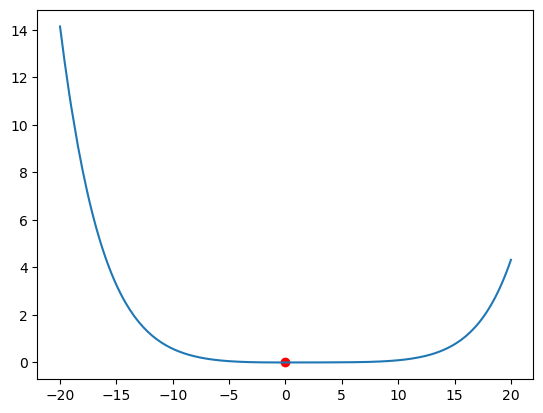

In [22]:
# find minimum
imin = np.argmin(nll)
nll_min = nll[imin]
c6_at_nll_min = c6_vals[imin]

# plot the scan + minimum
plt.plot(c6_vals, nll)
plt.scatter(c6_at_nll_min, nll_min, marker='o', color='red')
plt.show()

In [24]:
c6_vals = np.round(c6_vals, decimals = 1)
df = pd.DataFrame({'c6' : c6_vals, 'nll' : nll} )
df.to_csv('c6_nll_unbinned.csv', index=False)